## Data Wrangling WeRateDogs Dataset
By Vedavyas Kamath

In [1]:
# Import all the required libraries:
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import json

### Gathering the Data

##### 1) WeRateDogs Twitter Archive

In [3]:
# Load the data in twitter-archive-enhanced.csv' into Pandas dataframe
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_df.shape

(2356, 17)

In [5]:
twitter_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


##### 2) Tweet Image Predictions

In [6]:
#Using the requests package to download image predictions file from given URL:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [8]:
#creating a folder to save image predictions data:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
#Write image predictions data to a file in our folder
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [6]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
image_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [8]:
image_df.shape

(2075, 12)

##### 3) Twitter API

In [22]:
# Authentication process to use Tweepy API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [27]:
# Creating list of tweet ids
tweet_id = twitter_archive_df['tweet_id']
#Check:
print(tweet_id[0:5])
#check total count:
print(len(tweet_id))

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64
2356


In [28]:
#Investigating the first tweet to check the information being made available.
tweet = api.get_status(tweet_id[0])
tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [29]:
# Iterate over tweet_ids to obtain favorites and retweet count. Then append these into df_list.
df_list = []

# Any tweet_ids not found by API, whenever exception is raised are appended to e_list
e_list = []

for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        e_list.append(id)

892420643555336193 36987 7891
892177421306343426 31839 5862
891815181378084864 23976 3868
891689557279858688 40318 8052
891327558926688256 38530 8723
891087950875897856 19370 2898
890971913173991426 11294 1918
890729181411237888 62414 17621
890609185150312448 26659 4001
890240255349198849 30510 6860
890006608113172480 29387 6841
889880896479866881 26669 4659
889665388333682689 45992 9358
889638837579907072 25913 4202
889531135344209921 14470 2109
889278841981685760 24114 4993
888917238123831296 27865 4197
888804989199671297 24469 3976
888554962724278272 18949 3273
888078434458587136 20826 3239
887705289381826560 28912 5019
887517139158093824 44329 10962
887473957103951883 65894 16842
887343217045368832 32231 9759
887101392804085760 29261 5557
886983233522544640 33544 7163
886736880519319552 11503 3022
886680336477933568 21467 4157
886366144734445568 20240 2971
886267009285017600 115 4
886258384151887873 26756 5885
886054160059072513 0 101
885984800019947520 31209 6304
88552894320547020

838083903487373313 17989 3215
837820167694528512 34871 8044
837482249356513284 3915 448
837471256429613056 13070 2325
837110210464448512 16389 2428
836989968035819520 13007 2335
836753516572119041 19709 4750
836677758902222849 12880 2272
836648853927522308 0 563
836397794269200385 0 28233
836380477523124226 15090 3054
836260088725786625 21773 4397
836001077879255040 19525 4363
835685285446955009 0 8339
835574547218894849 18190 3698
835536468978302976 0 1740
835309094223372289 0 21559
835297930240217089 16820 3085
835264098648616962 7900 1740
835246439529840640 2149 73
835172783151792128 26761 5901
835152434251116546 22956 3103
834931633769889797 11074 1690
834786237630337024 21755 5625
834574053763584002 13988 2603
834477809192075265 0 10960
834458053273591808 9845 1726
834209720923721728 21102 4890
834167344700198914 16168 3750
834089966724603904 10284 2183
834086379323871233 13382 2265
833863086058651648 13710 2462
833826103416520705 18452 3858
833732339549220864 0 221
83372290175704

800388270626521089 11637 2942
800188575492947969 0 4150
800141422401830912 15955 2681
800018252395122689 29630 13824
799774291445383169 0 4919
799757965289017345 8762 2267
799422933579902976 8404 2020
799308762079035393 0 5754
799297110730567681 10320 2895
799063482566066176 8430 2591
798933969379225600 13687 4710
798925684722855936 7788 1503
798705661114773508 0 6950
798701998996647937 0 8177
798697898615730177 0 6822
798694562394996736 0 5217
798686750113755136 0 2446
798682547630837760 0 4947
798673117451325440 0 5822
798665375516884993 0 4094
798644042770751489 0 1949
798628517273620480 0 2067
798585098161549313 0 5992
798576900688019456 0 6122
798340744599797760 0 3527
798209839306514432 10848 2685
797971864723324932 12122 3275
797545162159308800 15156 5104
797236660651966464 20837 6945
797165961484890113 234 28
796904159865868288 0 9354
796865951799083009 8019 2010
796759840936919040 12380 3210
796563435802726400 0 7655
796484825502875648 7911 1849
796387464403357696 11478 4358
7

761599872357261312 4253 1221
761371037149827077 0 18666
761334018830917632 5355 1501
761292947749015552 4605 1124
761227390836215808 5463 1616
761004547850530816 11661 3595
760893934457552897 3922 1006
760656994973933572 6807 1973
760641137271070720 5112 1331
760539183865880579 7818 3742
760521673607086080 4359 1442
760290219849637889 27613 11882
760252756032651264 4057 899
760190180481531904 5867 1866
760153949710192640 0 31
759943073749200896 6113 2148
759923798737051648 15108 5850
759846353224826880 6909 2035
759793422261743616 6141 1959
759566828574212096 0 21764
759557299618865152 4844 1218
759447681597108224 8753 2522
759446261539934208 1721 501
759197388317847553 6240 2010
759159934323924993 0 1205
759099523532779520 14928 4301
759047813560868866 6682 2097
758854675097526272 3653 923


Rate limit reached. Sleeping for: 127


758828659922702336 11512 3967
758740312047005698 5893 1657
758474966123810816 3923 1028
758467244762497024 4943 2292
758405701903519748 5347 1974
758355060040593408 3515 1112
758099635764359168 19695 10353
758041019896193024 2785 385
757741869644341248 7072 3358
757729163776290825 0 8263
757725642876129280 4663 1248
757611664640446465 4693 1141
757597904299253760 0 306
757596066325864448 4460 1082
757400162377592832 15571 7057
757393109802180609 5989 1792
757354760399941633 4656 1472
756998049151549440 6462 2043
756939218950160384 6831 2068
756651752796094464 5206 1349
756526248105566208 10701 3699
756303284449767430 4061 1125
756288534030475264 44022 17974
756275833623502848 6606 1576
755955933503782912 7533 2962
755206590534418437 16911 5500
755110668769038337 21827 11425
754874841593970688 0 8180
754856583969079297 7071 2604
754747087846248448 2651 540
754482103782404096 5458 2009
754449512966619136 3859 747
754120377874386944 8074 2424
753655901052166144 5993 2225
75342052083462963

718613305783398402 2469 490
718540630683709445 2515 1028
718460005985447936 2748 531
718454725339934721 4940 1522
718246886998687744 1962 508
718234618122661888 3940 1015
717841801130979328 2500 610
717790033953034240 2927 1132
717537687239008257 5862 1875
717428917016076293 1636 453
717421804990701568 3202 858
717047459982213120 6387 1959
717009362452090881 3307 987
716802964044845056 4366 1191
716791146589110272 7439 1556
716730379797970944 1256 433
716447146686459905 13285 5973
716439118184652801 2409 214
716285507865542656 2816 1083
716080869887381504 6847 1940
715928423106027520 3244 890
715758151270801409 3783 1453
715733265223708672 4742 1712
715704790270025728 2850 571
715696743237730304 3973 1310
715680795826982913 4390 1642
715360349751484417 5557 1595
715342466308784130 3086 700
715220193576927233 2458 662
715200624753819648 5220 1912
715009755312439296 4237 1255
714982300363173890 3808 1051
714962719905021952 7471 4344
714957620017307648 4197 1426
714631576617938945 3327 10

693647888581312512 2744 602
693644216740769793 1373 126
693642232151285760 2585 417
693629975228977152 2486 807
693622659251335168 1563 378
693590843962331137 5152 1992
693582294167244802 1681 260
693486665285931008 1809 648
693280720173801472 3417 1259
693267061318012928 2426 827
693262851218264065 2264 508
693231807727280129 2924 751
693155686491000832 8023 3274
693109034023534592 1742 629
693095443459342336 1899 477
692919143163629568 2716 766
692905862751522816 2478 889
692901601640583168 1800 613
692894228850999298 2312 821
692828166163931137 2929 896
692752401762250755 6953 3707
692568918515392513 4437 1572
692535307825213440 3235 1388
692530551048294401 1870 421
692423280028966913 1509 232
692417313023332352 9517 3531
692187005137076224 2578 837
692158366030913536 2178 799
692142790915014657 1675 400
692041934689402880 3464 1292
692017291282812928 2930 979
691820333922455552 4031 1689
691793053716221953 8299 4305
691756958957883396 2924 1032
691675652215414786 1987 521
691483041

678643457146150913 2073 419
678446151570427904 4053 1571
678424312106393600 5556 2582
678410210315247616 4276 1840
678399652199309312 80167 32175
678396796259975168 1615 419
678389028614488064 1892 431
678380236862578688 2472 923
678341075375947776 1748 543
678334497360859136 1319 259
678278586130948096 11555 6146
678255464182861824 1609 368
678023323247357953 1947 388
678021115718029313 13857 6405
677961670166224897 3457 1701
677918531514703872 1363 417
677895101218201600 4888 2111
677716515794329600 3090 986
677700003327029250 3416 1456
677698403548192770 1240 323
677687604918272002 2503 851
677673981332312066 3355 1517
677662372920729601 1961 961
677644091929329666 1876 804
677573743309385728 2150 722
677565715327688705 1309 466
677557565589463040 2458 1165
677547928504967168 6989 3701
677530072887205888 1078 233
677335745548390400 3059 1799
677334615166730240 1358 285
677331501395156992 1097 237
677328882937298944 3662 1516
677314812125323265 1654 533
677301033169788928 1245 407
67

Rate limit reached. Sleeping for: 406


676975532580409345 2797 1081
676957860086095872 2246 814
676949632774234114 1317 398
676948236477857792 2185 868
676946864479084545 1738 374
676942428000112642 2084 758
676936541936185344 12781 4947
676916996760600576 2995 1810
676897532954456065 2261 724
676864501615042560 2109 715
676821958043033607 23160 15726
676819651066732545 1820 669
676811746707918848 1421 425
676776431406465024 5024 2034
676617503762681856 2914 973
676613908052996102 1085 199
676606785097199616 1888 440
676603393314578432 1163 384
676593408224403456 4601 2170
676590572941893632 917 126
676588346097852417 2325 793
676582956622721024 1204 280
676575501977128964 2595 1120
676533798876651520 1882 555
676496375194980353 1523 532
676470639084101634 11661 4689
676440007570247681 1726 671
676430933382295552 1397 347
676263575653122048 2080 551
676237365392908289 1224 288
676219687039057920 75999 31108
676215927814406144 1748 584
676191832485810177 2290 1040
676146341966438401 1921 660
676121918416756736 2165 1163
6761

670780561024270336 776 285
670778058496974848 324 72
670764103623966721 1055 414
670755717859713024 433 109
670733412878163972 945 503
670727704916926465 815 353
670717338665226240 1184 485
670704688707301377 763 367
670691627984359425 586 241
670679630144274432 740 276
670676092097810432 243 41
670668383499735048 10542 4932
670474236058800128 1487 729
670468609693655041 349 85
670465786746662913 952 539
670452855871037440 540 202
670449342516494336 1179 643
670444955656130560 6631 1949
670442337873600512 634 195
670435821946826752 1036 507
670434127938719744 1378 633
670433248821026816 324 111
670428280563085312 1359 612
670427002554466305 516 158
670421925039075328 1284 620
670420569653809152 619 309
670417414769758208 561 314
670411370698022913 1998 875
670408998013820928 552 220
670403879788544000 421 152
670385711116361728 552 202
670374371102445568 740 267
670361874861563904 324 65
670338931251150849 418 107
670319130621435904 3821 1205
670303360680108032 425 130
6702904201114419

In [30]:
# View list of exceptions
e_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288,
 677187300187611136]

In [31]:
# Try re-iteration for tweet_ids in exception list as suggested by other students to see if there was an error the 
# first time.   
ee_list = []

for e in e_list:
    try:
        page = api.get_status(e, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        
        df_list.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweet_count': int(retweets)
                        })
        
    except Exception:
        ee_list.append(e)

In [32]:
# View list of exceptions again. Assuming that these tweets are no longer available and will not be possible to get
ee_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288,
 677187300187611136]

In [33]:
# With the data collected, create a pandas dataframe
json_tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])

In [34]:
# Save a copy of the data to a txt file for future reference as requested by the project
json_tweets_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [35]:
# Created a csv file in order to download and open without issues in Excel for visual inspection
json_tweets_df.to_csv('tweet_json.csv',encoding='utf-8',index=False)

In [9]:
json_tweets_df = pd.read_csv('tweet_json.csv')

In [10]:
json_tweets_df.head(1)

,tweet_id,favorites,retweet_count
0,892420643555336193,36987,7891


In [11]:
json_tweets_df.shape

(2332, 3)

## Assessing the Data


1. Visual Assessment:  While gathering and loading the data from multiple sources into pandas, opened each of the three datasets were in pandas using head() in order to see what data looks like.
Opened the source files for each of the dataset in Excel as there are only around 2,400 entries at maximum. Was able to identify that the dataset had many incorrect names.


2. Programmatically: Further did some sampling to investigate and see what the data looks like in pandas using df.info(), df.head(), df.sample() and df['column'].value_counts() to see what are the counts of different values being held in the columns. Also used df.describe() to see what the summary statistics for numeric variables looks like.



In [12]:
#Take backup:
twitter_clean= twitter_df.copy()
image_clean= image_df.copy()
tweets_clean =json_tweets_df.copy()

In [13]:
#Export to csv:
# Save a copy of the clean datasets to work with
twitter_clean.to_csv('twitter_clean.csv',encoding='utf-8',index=False)
image_clean.to_csv('image_clean.csv',encoding='utf-8',index=False)
tweets_clean.to_csv('tweets_clean.csv',encoding='utf-8',index=False)

In [14]:
#List of df:
print(twitter_clean.shape)
print(image_clean.shape)
print(tweets_clean.shape)

(2356, 17)
(2075, 12)
(2332, 3)


###  2. Programatic Assessment

#### 1. Twitter Archive Data:

In [15]:
#Check the list of variables in dataset:
list(twitter_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [16]:
# See number of non-null entries and datatypes for each column
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#Check summary statistics for all numeric variables:
twitter_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_clean.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
Toby              7
an                7
Buddy             7
Bailey            7
Daisy             7
Rusty             6
Milo              6
Oscar             6
Jax               6
Koda              6
Jack              6
Dave              6
Scout             6
Leo               6
Stanley           6
Bella             6
Louis             5
               ... 
Sunshine          1
Tuck              1
Bertson           1
Hanz              1
Sundance          1
Ebby              1
Jebberson         1
Karl              1
Jazzy             1
Creg              1
Mollie            1
Cleopatricia      1
Gabby             1
Barclay           1
Rambo             1
Asher             1
Bodie             1
Alf               1
Lacy              1


In [19]:
#Check duplicate name values of dogs:
twitter_clean[twitter_clean.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [20]:
#Check counts and distinct values in rating_denominator column:
twitter_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
#Check counts and distinct values in rating_numerator column:
twitter_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
#Check counts and distinct values in source column:
twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
#Check 10 randomly selected entries from dataset:
twitter_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
1052,742528092657332225,NaN,NaN,2016-06-14 01:24:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's pumped as hell for the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742528092...,10,10,Maxaroni,None,None,None,None
2097,670733412878163972,NaN,NaN,2015-11-28 22:38:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a great listener. Low main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670733412...,8,10,Jerry,None,None,None,None
556,803638050916102144,NaN,NaN,2016-11-29 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pupper hath acquire enemy. 13/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803638050...,13,10,None,None,None,pupper,None
2296,667090893657276420,NaN,NaN,2015-11-18 21:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None
1974,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fletcher. He's had a ruff night. No mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,None,None,pupper,None
723,782969140009107456,NaN,NaN,2016-10-03 15:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cali. She arrived preassembled. Conven...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782969140...,12,10,Cali,None,None,None,None
2078,670832455012716544,NaN,NaN,2015-11-29 05:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amy. She is Queen Starburst. 10/10 une...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670832455...,10,10,Amy,None,None,None,None
494,813187593374461952,NaN,NaN,2016-12-26 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in other ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813187593...,13,10,None,None,None,None,None


#### 2. Image Prediction Data:

In [24]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
#Check summary statistics
image_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
##Check counts and distinct values of breeds in p1 column:
image_clean.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [27]:
##Check counts and distinct values of breeds in p2 column:
image_clean.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
malinois                           20
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [28]:
##Check counts and distinct values of breeds in p3 column:
image_clean.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [29]:
#Pick and view randomly selected 10 rows from dataset
image_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True
1644,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
280,671115716440031232,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False
493,675707330206547968,https://pbs.twimg.com/media/CWCYOqWUAAARmGr.jpg,1,bath_towel,0.721933,False,Staffordshire_bullterrier,0.059344,True,bagel,0.035702,False
1308,753655901052166144,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,0.144147,True
794,690932576555528194,https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg,1,snorkel,0.526536,False,muzzle,0.048089,False,scuba_diver,0.034226,False
1792,830956169170665475,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,golden_retriever,0.317196,True,English_setter,0.132759,True
1247,747600769478692864,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
888,699079609774645248,https://pbs.twimg.com/media/CbOhMUDXIAACIWR.jpg,3,schipperke,0.667324,True,Chesapeake_Bay_retriever,0.119550,True,kelpie,0.097600,True


#### 3. Tweets Data:

In [30]:
#Check number of rows and columns in dataset
tweets_clean.shape

(2332, 3)

In [31]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id         2332 non-null int64
favorites        2332 non-null int64
retweet_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [32]:
#Check summary statistics for numeric varaibles
tweets_clean.describe()

,tweet_id,favorites,retweet_count
count,2.332000e+03,2332.000000,2332.000000
mean,7.419557e+17,7718.469554,2780.181389
std,6.820752e+16,11980.335927,4705.288191
min,6.660209e+17,0.000000,1.000000
25%,6.783205e+17,1337.750000,558.250000
50%,7.184574e+17,3361.500000,1300.000000
75%,7.986673e+17,9473.500000,3233.000000
max,8.924206e+17,159866.000000,79858.000000


In [33]:
#Pick 10 entries a random to view from dataset
tweets_clean.sample(10)

,tweet_id,favorites,retweet_count
2266,667171260800061440,216,84
616,793614319594401792,0,3278
697,783839966405230592,31214,11265
1240,710140971284037632,2810,896
2092,670427002554466305,516,158
634,792394556390137856,14022,4503
1997,672082170312290304,928,357
50,882268110199369728,42970,10832
923,752660715232722944,4511,1605
64,879492040517615616,22466,2977


### Quality Issues:

> Data with issues in its content is DIRTY data. Also called Low quality data that maybe:
1. inaccurate data
2. corrupted data
3. Duplicate data

#### List of Quality Issues in data:

- Q1: tweet_id is an integer but should be a string
- Q2: Data for retweets also present.
- Q3: Data includes replies which need to be removed.
- Q4: There are tweets with no images which need to be removed.
- Q5: Dogs with incorrect names like: a, all , an, by, getting, just, not, old, unacceptable, the, this
- Q6: timestamp column is a string object whereas should be datetime object
- Q7: Source column has 3 different categories which are too complex and can be simplified.
- Q8: There are 3 predictions for the dog breeds instead of which its better to pick the most likely one. 
- Q9: There are some dogs having multiple dog types.
- Q10: Incorrect values present in numerator of ratings.

### Tidiness Issues:

> Messy data is data having Structural or organizational issues.

#### List of Messy Issues in data:

- T1: Related Data is scattered across 3 different data frames
- T2: There are 4 separate Dog Type variables doggo, fluffer, pupper and puppo which ideally should be 1 variable

## Cleaning the Data

### T1: Merge 3 dataframes into one main dataframe:

In [35]:
# Merge the three DataFrames into one main Data frame, starting first with archive_clean and json_clean
first_main_df = pd.merge(twitter_clean, tweets_clean, on=['tweet_id','tweet_id'],how='left')

In [36]:
#View after 1st merge to see if columns from both datasets are showing
first_main_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,36987.0,7891.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,31839.0,5862.0


In [37]:
# Merge new master with image_clean
main_df = pd.merge(first_main_df, image_clean, on='tweet_id',how='left')

In [38]:
#Check for list of columns to see variables from all dataframes are present:
list(main_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [39]:
#Check list of columns and their datatypes
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     23

In [40]:
#Save a copy of this dataframe as csv:
main_df.to_csv('twitter_all.csv',encoding='utf-8',index=False)

In [2]:
#Load the saved csv file back into a new dataframe
twitter = pd.read_csv('twitter_all.csv')

In [3]:
#Check if data frame has loaded
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### Q1: Converting the tweet_id column to string:

In [4]:
# Converted the tweet_id column to string as this a distinct value for each tweet and no numeric operations need to be 
# performed on this: 
twitter.tweet_id=twitter.tweet_id.astype(str)

In [5]:
#Check to see if tweet id has become string or not:
twitter.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
favorites                     float64
retweet_count                 float64
jpg_url                        object
img_num                       float64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf                       float64
p2_dog      

### Q2: Remove Re-tweets:

In [6]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     2

In [7]:
#We can see a total of 181 non-null entries in 3 columns related to re-tweets which are (retweeted_status_id, 
#retweeted_status_user_id and retweeted_status_timestamp)
#As per the original requirement of the project, we want only original ratings and NO re-tweets.

#Thus, keeping only null entries for these columns in the data thereby removing the 181 non-null entries:
twitter = twitter[twitter.retweeted_status_id.isnull()]

In [8]:
#Check if the 181 non-null entries have been removed:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
favorites                     2167 no

In [9]:
# Now since these 3 columns (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) related to re-tweets 
# all hold only Null values, there is no use of keeping them in the dataset.
# Thus, remove these columns from dataset:

twitter = twitter.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [10]:
#Check if columns have been dropped or not:
twitter.dtypes

tweet_id                  object
in_reply_to_status_id    float64
in_reply_to_user_id      float64
timestamp                 object
source                    object
text                      object
expanded_urls             object
rating_numerator           int64
rating_denominator         int64
name                      object
doggo                     object
floofer                   object
pupper                    object
puppo                     object
favorites                float64
retweet_count            float64
jpg_url                   object
img_num                  float64
p1                        object
p1_conf                  float64
p1_dog                    object
p2                        object
p2_conf                  float64
p2_dog                    object
p3                        object
p3_conf                  float64
p3_dog                    object
dtype: object

### Q3: Remove Replies:

In [11]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
favorites                2167 non-null float64
retweet_count            2167 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf             

In [12]:
# There are 2 columns in dataset in_reply_to_status_id and in_reply_to_user_id which holds the tweet_id of original 
# tweet along with user_id of orignal tweet.
#We can see a total of 78 entries that have such an information.

twitter = twitter[twitter.in_reply_to_status_id.isnull()]

In [13]:
#Check if the 78 non-null entries have been removed:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2097 non-null object
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
favorites                2089 non-null float64
retweet_count            2089 non-null float64
jpg_url                  1971 non-null object
img_num                  1971 non-null float64
p1                       1971 non-null object
p1_conf               

In [14]:
# delete columns related to replies as these are no longer significant:

twitter = twitter.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [15]:
#Check if columns have been dropped or not:
twitter.dtypes

tweet_id               object
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator        int64
rating_denominator      int64
name                   object
doggo                  object
floofer                object
pupper                 object
puppo                  object
favorites             float64
retweet_count         float64
jpg_url                object
img_num               float64
p1                     object
p1_conf               float64
p1_dog                 object
p2                     object
p2_conf               float64
p2_dog                 object
p3                     object
p3_conf               float64
p3_dog                 object
dtype: object

### Q4: Remove Tweets that do not have Images:

In [16]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorites             2089 non-null float64
retweet_count         2089 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-

In [17]:
#The column jpg_url holds the url of the image that is assoociated with a tweet.
#We want entries for only tweets that have an image
#We see that there are a total of 2097 entries in the dataset whereas there are only 1971 non-null entries in the jpg_url column
# This means that there are 126 tweets without an image and these need to be removed.

twitter = twitter[twitter.jpg_url.notnull()]

In [18]:
#Check if the entries for 126 tweets with null image entries have been removed:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorites             1963 non-null float64
retweet_count         1963 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-

### Q5: Replace all incorrect names as None:

In [19]:
twitter.name.value_counts()

None         524
a             55
Charlie       11
Lucy          10
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
the            7
Daisy          7
Toby           7
Lola           7
Bo             6
Jax            6
an             6
Bella          6
Stanley        6
Koda           6
Chester        5
Oscar          5
Buddy          5
Louis          5
Rusty          5
Milo           5
Bailey         5
Dave           5
Scout          5
Leo            5
            ... 
Sparky         1
Dook           1
Jonah          1
Corey          1
Kollin         1
Rey            1
Sage           1
Fynn           1
Strudel        1
Sully          1
Ginger         1
Dylan          1
Ashleigh       1
Vixen          1
Kenny          1
Jaspers        1
Schnitzel      1
Livvie         1
Fizz           1
Carbon         1
Brudge         1
Andy           1
Logan          1
Tyrone         1
Sailor         1
Caryl          1
Ester          1
Trigger       

In [20]:
# Observed a pattern where could see that correct names had first letter in capitals and the incorrect names have 
# first letter in smalls:

# Thus, checking this to see if its true for all incorrect names and writing all incorrect names to new list:
incorrect_names = []
names = list(twitter['name'])
for i in range(len(names)):
    if names[i][0].islower() == True:
        print(names[i])
        incorrect_names.append(names[i])

such
a
quite
quite
one
incredibly
a
a
very
my
one
not
his
one
a
a
a
an
very
a
just
getting
very
this
unacceptable
all
a
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


In [21]:
#Convert the incorrect names to a pandas series to make it easy to inspect and work with:
wrong_names = pd.Series(incorrect_names)

In [22]:
wrong_names.head()

0     such
1        a
2    quite
3    quite
4      one
dtype: object

In [23]:
#Found the unique incorrect values and saved it to a numpy array:
unique_wrong_names = wrong_names.unique()
unique_wrong_names

array(['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not',
       'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space'], dtype=object)

In [24]:
#Writing a function to replace all incorrect names as 'None':
correct_names = []

#function iterates through name column checking if the first letter is lowercase.
def check_names(row):
    if row['name'][0].islower() == True:
        correct_names.append('None')
    else:
        correct_names.append(row['name'])
        
# call function using pandas apply by columns
twitter.apply(check_names, axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
31      None
        ... 
2326    None
2327    None
2328    None
2329    None
2330    None
2331    None
2332    None
2333    None
2334    None
2335    None
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345    None
2346    None
2347    None
2348    None
2349    None
2350    None
2351    None
2352    None
2353    None
2354    None
2355    None
Length: 1971, dtype: object

In [25]:
#add names list to master dataframe and check dataframe
twitter['names'] = correct_names
twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,names
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Franklin


In [26]:
# Check some of the value in newly created 'names' column for incorrect values that we had identified in old 'name' column:
twitter.query('name == "an"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,names
1025,746369468511756288,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,...,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,2.416150e-02,False,None
1362,703041949650034688,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,...,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,2.636430e-02,False,None
2204,668636665813057536,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,...,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False,None
2333,666337882303524864,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,...,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,1.026430e-01,True,None
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,...,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,2.558060e-02,True,None
2349,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,...,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,1.788530e-02,False,None


In [27]:
twitter['names'].value_counts()

None         622
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Daisy          7
Lola           7
Toby           7
Koda           6
Stanley        6
Bo             6
Jax            6
Bella          6
Leo            5
Scout          5
Rusty          5
Dave           5
Buddy          5
Oscar          5
Milo           5
Bailey         5
Chester        5
Louis          5
Gus            4
Winnie         4
Jack           4
            ... 
Chesney        1
Sparky         1
Dook           1
Jonah          1
Corey          1
Bode           1
Kollin         1
Rey            1
Fizz           1
Sully          1
Ginger         1
Dylan          1
Ashleigh       1
Vixen          1
Kenny          1
Jaspers        1
Schnitzel      1
Livvie         1
Carbon         1
Sage           1
Brudge         1
Andy           1
Logan          1
Tyrone         1
Sailor         1
Ester          1
Trigger        1
Boston        

In [28]:
#Update the name column with values in newly created names column:
twitter['name'] = twitter['names']

In [29]:
#Running the query statement used before to look for incorrect names:
twitter.query('name == "unacceptable"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,names


In [30]:
#Check if name column is reflecting correct name value:
twitter['name'].value_counts()

None         622
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Daisy          7
Lola           7
Toby           7
Koda           6
Stanley        6
Bo             6
Jax            6
Bella          6
Leo            5
Scout          5
Rusty          5
Dave           5
Buddy          5
Oscar          5
Milo           5
Bailey         5
Chester        5
Louis          5
Gus            4
Winnie         4
Jack           4
            ... 
Chesney        1
Sparky         1
Dook           1
Jonah          1
Corey          1
Bode           1
Kollin         1
Rey            1
Fizz           1
Sully          1
Ginger         1
Dylan          1
Ashleigh       1
Vixen          1
Kenny          1
Jaspers        1
Schnitzel      1
Livvie         1
Carbon         1
Sage           1
Brudge         1
Andy           1
Logan          1
Tyrone         1
Sailor         1
Ester          1
Trigger        1
Boston        

In [31]:
#Remove the names column that was added:
twitter = twitter.drop('names', axis=1)

In [32]:
#See the final list of columns in data:
twitter.dtypes

tweet_id               object
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator        int64
rating_denominator      int64
name                   object
doggo                  object
floofer                object
pupper                 object
puppo                  object
favorites             float64
retweet_count         float64
jpg_url                object
img_num               float64
p1                     object
p1_conf               float64
p1_dog                 object
p2                     object
p2_conf               float64
p2_dog                 object
p3                     object
p3_conf               float64
p3_dog                 object
dtype: object

### Q9: Merging Multiple Dog Stages

In [40]:
#Check value counts of all 4 variables of dog types:
twitter.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1668
1,,,,puppo,22
2,,,pupper,,201
3,,floofer,,,7
4,doggo,,,,63
5,doggo,,,puppo,1
6,doggo,,pupper,,8
7,doggo,floofer,,,1


###### NOTE: 
We see a total of 10 entries that contain multiple values. So now we we plan to concatenate multiple values into 1 new column stage separated by a comma.

In [35]:
# As we can see a lot of none values above, removing the none valys and replacing by empty strings in each of the 4 dog type 
# variables:
#in doggo variable:
twitter.doggo.replace('None', '', inplace=True)
twitter.doggo.replace(np.NaN, '', inplace=True)

In [37]:
#in floofer variable:
twitter.floofer.replace('None', '', inplace=True)
twitter.floofer.replace(np.NaN, '', inplace=True)

In [38]:
#in pupper variable:
twitter.pupper.replace('None', '', inplace=True)
twitter.pupper.replace(np.NaN, '', inplace=True)

In [39]:
#in puppo variable:
twitter.puppo.replace('None', '', inplace=True)
twitter.puppo.replace(np.NaN, '', inplace=True)

In [42]:
twitter['stage'] = twitter.doggo + twitter.floofer + twitter.pupper + twitter.puppo


In [46]:
twitter.stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [48]:
#we we plan to concatenate multiple values into 1 value separated by comma eg: (doggo, puppo):
twitter.loc[twitter.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter.loc[twitter.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter.loc[twitter.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [49]:
twitter.stage.value_counts()

                  1668
pupper             201
doggo               63
puppo               22
doggo, pupper        8
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### T2: Combine 4 Dog Type variables doggo, fluffer, pupper and puppo into one new variable:

In [50]:
#Get the list of variables in dataset:
list(twitter)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'stage']

In [53]:
#Combine the 4 different variables into 1 new variable dog_type using pandas melt() function:
twitter1 = pd.melt(twitter, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog','stage'],
                   value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                   value_name='dog_type')

In [54]:
# See if new columns were added:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 24 columns):
tweet_id              7884 non-null object
timestamp             7884 non-null object
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null int64
rating_denominator    7884 non-null int64
name                  7884 non-null object
favorites             7852 non-null float64
retweet_count         7852 non-null float64
jpg_url               7884 non-null object
img_num               7884 non-null float64
p1                    7884 non-null object
p1_conf               7884 non-null float64
p1_dog                7884 non-null object
p2                    7884 non-null object
p2_conf               7884 non-null float64
p2_dog                7884 non-null object
p3                    7884 non-null object
p3_conf               7884 non-null float64
p3_dog                7884 no

In [55]:
# see the count of different types of dogs:
twitter1.dog_type.value_counts()

           7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [56]:
# Now delete the duplicate entries for each dog that does not contain a dog_type value:
#we do this by sorting the values by dog type and delete duplicates by keeping the last entry:
twitter1 = twitter1.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [57]:
twitter1.dog_type.value_counts()

           1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [58]:
#Take a random subset of 10 samples of data to see values of dog_type
twitter1.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,variable,dog_type
2522,777684233540206592,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,None,11634.0,3056.0,...,True,golden_retriever,0.162850,True,otterhound,0.110921,True,,floofer,
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,None,44329.0,10962.0,...,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,,doggo,
3063,699423671849451520,2016-02-16 02:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't ever talk to me or my son again."" ...bo...",https://twitter.com/dog_rates/status/699423671...,10,10,None,1395.0,334.0,...,True,French_bulldog,0.001825,True,bull_mastiff,0.000299,True,,floofer,
2892,715928423106027520,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,3244.0,890.0,...,True,French_bulldog,0.019663,True,bull_mastiff,0.002278,True,,floofer,
3812,668297328638447616,2015-11-22 05:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",2 rare dogs. They waddle (v inefficient). Some...,https://twitter.com/dog_rates/status/668297328...,9,10,None,612.0,294.0,...,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True,,floofer,
3676,670811965569282048,2015-11-29 03:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,https://twitter.com/dog_rates/status/670811965...,10,10,Maggie,1112.0,268.0,...,True,Walker_hound,0.003973,True,beagle,0.001406,True,,floofer,
3152,691444869282295808,2016-01-25 02:17:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She likes flowers. 12/10 https...,https://twitter.com/dog_rates/status/691444869...,12,10,Bailey,2701.0,864.0,...,True,Border_collie,0.085805,True,EntleBucher,0.043769,True,,floofer,
3515,674269164442398721,2015-12-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,https://twitter.com/dog_rates/status/674269164...,8,10,Bob,902.0,225.0,...,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True,,floofer,
3404,677331501395156992,2015-12-17 03:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Humphrey. He's a Northern Polyp Viagra. O...,https://twitter.com/dog_rates/status/677331501...,9,10,Humphrey,1097.0,237.0,...,True,boxer,0.218503,True,French_bulldog,0.106462,True,,floofer,
2707,748568946752774144,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cora. She rings a bell for treats. 12/...,https://twitter.com/dog_rates/status/748568946...,12,10,Cora,2245.0,680.0,...,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True,,floofer,


In [59]:
# Set to view all columns
pd.set_option('display.max_columns', None)

#As a check picked a tweet_id from data set before melting "883360690899218434" which I knew was floofer to see if the 
# same value is being held in dog_type column
twitter1.query('tweet_id == "883360690899218434"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,variable,dog_type
2011,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,21694.0,3458.0,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.00214,True,floofer,floofer,floofer


In [60]:
#delete the extra 'variable' column that was created by default while using the melt() function:

twitter1 = twitter1.drop('variable',axis=1)

In [61]:
# Check if variable column has been dropped
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 23 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             1963 non-null float64
retweet_count         1963 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971

### Q6: Converting the timestamp column from string to Datetime:

In [62]:
#view some entries to understand in what format the data is stored:
twitter1['timestamp'].head(10)

1895    2015-11-19 18:13:27 +0000
1894    2015-11-19 20:14:03 +0000
1893    2015-11-19 20:20:22 +0000
1892    2015-11-19 20:44:47 +0000
1891    2015-11-19 21:22:56 +0000
1890    2015-11-19 21:32:34 +0000
1889    2015-11-19 22:32:36 +0000
1888    2015-11-19 23:53:52 +0000
1887    2015-11-20 00:12:54 +0000
1886    2015-11-20 00:40:05 +0000
Name: timestamp, dtype: object

In [63]:
#View last 10 entries for timestamp
twitter1['timestamp'].tail(10)

6018    2017-05-24 16:44:18 +0000
6236    2017-01-13 17:00:21 +0000
6720    2016-06-03 01:07:16 +0000
6059    2017-04-22 18:31:02 +0000
6408    2016-10-16 18:11:26 +0000
6046    2017-05-03 03:17:27 +0000
6390    2016-10-25 16:00:09 +0000
6588    2016-07-21 23:53:04 +0000
6443    2016-09-28 00:46:20 +0000
6618    2016-07-07 19:16:47 +0000
Name: timestamp, dtype: object

In [64]:
#view randomly 10 entries present in data: 
twitter1['timestamp'].sample(10)

3730    2015-11-27 01:10:17 +0000
2554    2016-09-03 16:04:27 +0000
3529    2015-12-08 00:15:09 +0000
734     2016-07-01 01:40:41 +0000
2821    2016-05-09 00:11:16 +0000
2508    2016-09-25 00:06:08 +0000
2390    2016-11-23 04:45:12 +0000
1887    2015-11-20 00:12:54 +0000
2201    2017-02-24 23:04:14 +0000
2804    2016-05-20 02:18:32 +0000
Name: timestamp, dtype: object

In [65]:
#Can see +0000 is added at the end of each timestamp entry and this has to be stripped off in order to be able to
# convert the this column from string to datetime
twitter1['timestamp'] = twitter1['timestamp'].str.strip('+0000')

In [66]:
#Now again view the data to check if +0000 has been stripped off:
twitter1['timestamp'].head()

1895    2015-11-19 18:13:27 
1894    2015-11-19 20:14:03 
1893    2015-11-19 20:20:22 
1892    2015-11-19 20:44:47 
1891    2015-11-19 21:22:56 
Name: timestamp, dtype: object

In [67]:
#The data now seems to be in correct format to be converted:
#thus, convert the data to datetime object

twitter1['timestamp'] = pd.to_datetime(twitter1['timestamp'])

In [68]:
#View 1st 5 entries:
twitter1['timestamp'].head()

1895   2015-11-19 18:13:27
1894   2015-11-19 20:14:03
1893   2015-11-19 20:20:22
1892   2015-11-19 20:44:47
1891   2015-11-19 21:22:56
Name: timestamp, dtype: datetime64[ns]

In [69]:
#Check if datatype of timestamp column is set to be datetime correctly:
twitter1.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
favorites                    float64
retweet_count                float64
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
p2                            object
p2_conf                      float64
p2_dog                        object
p3                            object
p3_conf                      float64
p3_dog                        object
stage                         object
dog_type                      object
dtype: object

### Q7: Simplify the different sources of data:

In [70]:
# See the different possible source along with their counts:
twitter1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [71]:
# We can see that actual source info lies between the <a href ....> and </a> tags for all 3 sources:
# By using regular expressions we need to extract the data that starts with <a.....>(fetch this) and ends with </a>

twitter1['source'].str.extract('^<a.+>(.+)</a>$')

,0
1895,Twitter for iPhone
1894,Twitter for iPhone
1893,Twitter for iPhone
1892,Twitter for iPhone
1891,Twitter Web Client
1890,Twitter Web Client
1889,Twitter Web Client
1888,Twitter Web Client
1887,Twitter Web Client
1886,Twitter Web Client


In [72]:
# Save the result of above to the source column in data:

twitter1['source'] = twitter1['source'].str.extract('^<a.+>(.+)</a>$')

In [73]:
# check if the simplified source is showing as expected:
twitter1['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Q8: Choose the most likely prediction of breed from the 3 given columns

In [74]:
#Define 2 empty lists in which we will store the most likely breed and its confidence interval:
breed = []
confidence = []

In [75]:
#Defining a function that will iterate through the available predictions for each tweet and pick the best one
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not Known')
        confidence.append(0)

In [76]:
#Apply the function defined above to out twitter datframe:
twitter1.apply(breed_confidence, axis=1)

1895    None
1894    None
1893    None
1892    None
1891    None
1890    None
1889    None
1888    None
1887    None
1886    None
1885    None
1884    None
1896    None
1883    None
1881    None
1880    None
1879    None
1878    None
1877    None
1876    None
1875    None
1874    None
1873    None
1872    None
1871    None
1870    None
1882    None
1897    None
1898    None
1899    None
        ... 
4682    None
5503    None
4590    None
5104    None
5497    None
4018    None
5504    None
5975    None
5991    None
6375    None
6329    None
6607    None
6689    None
6322    None
6207    None
6209    None
6678    None
6219    None
5925    None
5927    None
6018    None
6236    None
6720    None
6059    None
6408    None
6046    None
6390    None
6588    None
6443    None
6618    None
Length: 1971, dtype: object

In [77]:
#view the lists breed and confidence just to see if the above worked:
print(breed[0:5])
print(confidence[0:5])

['Saint_Bernard', 'Rottweiler', 'Not Known', 'Not Known', 'Labrador_retriever']
[0.381377, 0.999091, 0, 0, 0.8256700000000001]


In [78]:
#Add breed and confidence as columns to our dataset
twitter1['breed'] = breed
twitter1['confidence'] = confidence

In [79]:
#Check if new columns have been added:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 25 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             1963 non-null float64
retweet_count         1963 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog            

In [80]:
#Select 5 random samples to check the breed and confidence:
twitter1.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,dog_type,breed,confidence
2549,772581559778025472,2016-09-04 23:46:12,Twitter for iPhone,Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,None,6722.0,1754.0,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3.0,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True,,,Newfoundland,0.574345
1860,667911425562669056,2015-11-21 03:44:27,Twitter for iPhone,Wow. Armored dog here. Ready for battle. Face ...,https://twitter.com/dog_rates/status/667911425...,5,10,None,480.0,296.0,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,1.0,frilled_lizard,0.257695,False,ox,0.235160,False,triceratops,0.085317,False,,,Not Known,0.000000
3102,696488710901260288,2016-02-08 00:20:23,Twitter for iPhone,12/10 revolutionary af https://t.co/zKzq4nIY86,https://twitter.com/dog_rates/status/696488710...,12,10,None,2585.0,1037.0,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1.0,briard,0.369063,True,Scotch_terrier,0.168204,True,giant_schnauzer,0.120553,True,,,briard,0.369063
2925,711732680602345472,2016-03-21 01:54:29,Twitter for iPhone,I want to hear the joke this dog was just told...,https://twitter.com/dog_rates/status/711732680...,10,10,None,9007.0,4184.0,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3.0,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True,,,Ibizan_hound,0.334929
2694,749774190421639168,2016-07-04 01:17:51,Twitter for iPhone,This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,4769.0,1354.0,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1.0,Pekinese,0.879012,True,Chihuahua,0.054855,True,Blenheim_spaniel,0.021041,True,,,Pekinese,0.879012


In [81]:
#Drop unwanted columns as we have now chosen the most likely breed and confidence:
twitter1 = twitter1.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

### Q10: Correcting Incorrect Values of Ratings

In [99]:
# While assessing we have seen issues with ratings where rating values in decimals given by user in the tweet was extracted 
# incorrectly. One such example was numerator rating of 9.75 was recorded as 75 in our dataset.
# In order to clean this we extract the rating values from text column as below and save it:

ratings = twitter1.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [100]:
#Inspect the rating values
ratings.head()

,0,1
1895,7,10
1894,12,10
1893,10,10
1892,6,10
1891,11,10


In [102]:
# Convert the new rating values to be float type so we can incorporate decimal values:
ratings=ratings.astype(float)

In [103]:
# Check for erroneous record for 9.75 which was present before, is now being shown correctly
ratings[ratings[0] == 9.75]

,0,1
2470,9.75,10.0


In [104]:
# Add a new column for numerator in our dataset from the correct ratings we just extracted:
twitter1['new_numerator'] = ratings[0]

In [107]:
# Add a new column for denominator in our dataset from the correct ratings we just extracted:
twitter1['new_denominator'] = ratings[1]

In [108]:
# Inspect the dataset and check if new columns with correct ratings are matching correctly with the rating in their text
twitter1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,stage,dog_type,breed,confidence,new_numerator,new_denominator
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,453.0,216.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,,,Saint_Bernard,0.381377,7.0,10.0
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,300.0,83.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,,,Rottweiler,0.999091,12.0,10.0
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,441.0,229.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1.0,,,Not Known,0.000000,10.0,10.0
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,762.0,561.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,,,Not Known,0.000000,6.0,10.0
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,302.0,88.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,,,Labrador_retriever,0.825670,11.0,10.0


In [109]:
#Check for value where numerator is 9.75 but was incorrectly recorded as 75 and can see it worked:
twitter1.query('new_numerator == 9.75')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,stage,dog_type,breed,confidence,new_numerator,new_denominator
2470,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,18983.0,6399.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,,,Pomeranian,0.467321,9.75,10.0


In [110]:
#Now drop old columns having incorrect numerator and denominator ratings:
twitter1 = twitter1.drop(['rating_numerator', 'rating_denominator'],axis=1)

In [111]:
#Now see if the unwanted columns have been dropped
twitter1.head()

,tweet_id,timestamp,source,text,expanded_urls,name,favorites,retweet_count,jpg_url,img_num,stage,dog_type,breed,confidence,new_numerator,new_denominator
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,Biden,453.0,216.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,,,Saint_Bernard,0.381377,7.0,10.0
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,None,300.0,83.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,,,Rottweiler,0.999091,12.0,10.0
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,None,441.0,229.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1.0,,,Not Known,0.000000,10.0,10.0
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,None,762.0,561.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,,,Not Known,0.000000,6.0,10.0
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,Cupcake,302.0,88.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,,,Labrador_retriever,0.825670,11.0,10.0


### Finally Export the final dataframe after cleaning to CSV:

In [112]:
#Export the final cleaned dataframe as twitter_archive_master.csv
twitter1.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

## Visualisation:

### Relationship between favorites count by source and dog type

In [215]:
#Load the packages need to build visualisation:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

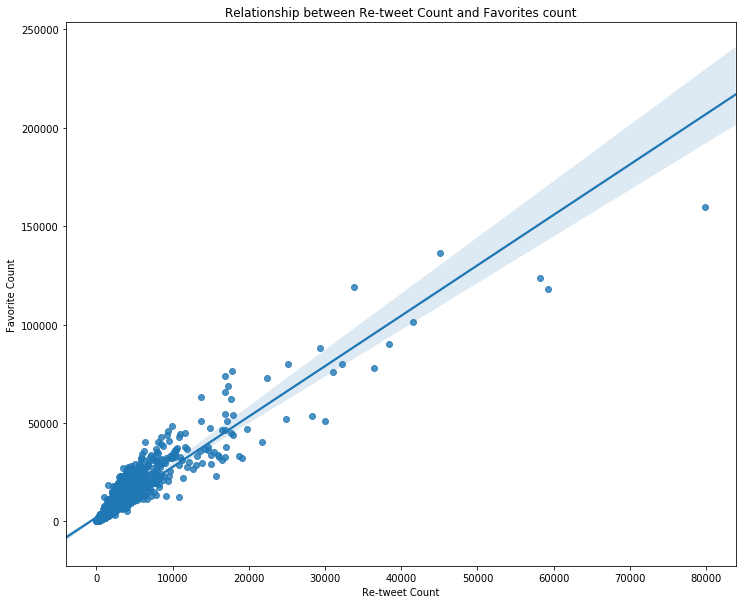

In [224]:
#set the figure size:
plt.figure(figsize = [12, 10])

#Built a regression plot with a regression line so that the trend can be easily observed:

sb.regplot(data = twitter1, x = 'retweet_count', y = 'favorites',   fit_reg = True);

#Set the x-label, y-label and chart title and font-size:
plt.title('Relationship between Re-tweet Count and Favorites count')    
plt.xlabel('Re-tweet Count');
plt.ylabel('Favorite Count'); 
plt.fontsize = 13

### 2. Most Popular Dog Breeds by Tweet Count:

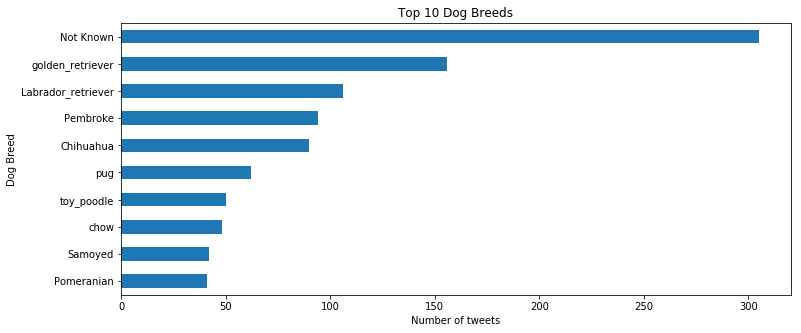

In [227]:
#set the figure size:
plt.figure(figsize = [12, 5])

#Plot a horizontal bar chart for top 10 dog breeds with highest counts:
twitter1['breed'].value_counts()[9::-1].plot(kind='barh')

#Set the x-label, y-label, chart title and font size:
plt.title('Top 10 Dog Breeds')
plt.xlabel('Number of tweets')
plt.ylabel('Dog Breed')
plt.fontsize = 13

### General Insights about Data:

1. We can see a strong positive co-relation between count of re-tweets and tweets that were marked as favorites. This is expected because people usually re-tweet to only those tweets that are really good and become popular and tweets that are popular also tend to be marked as favorites by users.


2. We can see by looking at the source column that majority of tweets that had been posted were from the iPhone app for Twitter!


3. We could see that majority of the tweets were with no dog type as such, however out of the 4 dog types, pupper is the most common with floofer being the least.